In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os
import numpy as np
from tensorflow.keras.regularizers import l2

In [2]:
train_datagen= ImageDataGenerator(rescale= 1./255)
val_datagen= ImageDataGenerator(rescale=1./255)

In [3]:
train_generator= train_datagen.flow_from_directory(
    'emotion_dataset_Not_augmented/train',
    target_size= (48,48),
    batch_size= 16,
    color_mode='grayscale'
    ,class_mode= 'categorical'
)
val_generator= val_datagen.flow_from_directory(
    'emotion_dataset_Not_augmented/test'
    ,target_size =(48,48)
    ,batch_size= 16,
    color_mode= 'grayscale'
    ,class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
from collections import Counter

class_counts = Counter(train_generator.classes)


class_labels = train_generator.class_indices 
index_to_class = {v: k for k, v in class_labels.items()}

print('Training Data Class Count:\n')
for class_index, count in class_counts.items():
    print(f"{index_to_class[class_index]}: {count} images")

print('\n')
class_counts = Counter(val_generator.classes)


class_labels = val_generator.class_indices 
index_to_class = {v: k for k, v in class_labels.items()}

print('Validation Data Class Counts:\n')
for class_index, count in class_counts.items():
    print(f"{index_to_class[class_index]}: {count} images")

Training Data Class Count:

angry: 3995 images
disgusted: 436 images
fearful: 4097 images
happy: 7215 images
neutral: 4965 images
sad: 4830 images
surprised: 3171 images


Validation Data Class Counts:

angry: 958 images
disgusted: 111 images
fearful: 1024 images
happy: 1774 images
neutral: 1233 images
sad: 1247 images
surprised: 831 images


In [5]:
model = Sequential()


model.add(Conv2D(64,kernel_size= (3,3),activation='relu' , strides= 1,input_shape=(48,48,1),padding='same'))
model.add(Conv2D(64,kernel_size= (3,3), activation='relu', strides=1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.3))

model.add(Conv2D(128,kernel_size= (3,3),activation='relu' , strides= 1, padding= 'same'))
model.add(Conv2D(128,kernel_size= (3,3), activation='relu', strides=1,padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2),strides= 2))
model.add(Dropout(0.4))



model.add(Conv2D(256,kernel_size= (3,3),activation='relu' , strides= 1,padding='same'))
model.add(Conv2D(256,kernel_size= (3,3), activation='relu', strides=1,padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.4))




model.add(Conv2D(512,kernel_size= (3,3),activation='relu' , strides= 1, padding= 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(1024,activation='relu', kernel_regularizer= l2(0.001)))
model.add(Dropout(0.6))
model.add(Dense(7, activation= 'softmax'))

In [6]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss= 'categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])

In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 128)       1

In [8]:
history = model.fit(
    train_generator, 
    validation_data= val_generator,
    epochs =30, 
    shuffle = True,

    
)

Epoch 1/30
1795/1795 [==============================] - 286s 155ms/step - loss: 3.5838 - accuracy: 0.2085 - val_loss: 3.5142 - val_accuracy: 0.2561
Epoch 2/30
1795/1795 [==============================] - 28s 15ms/step - loss: 3.0339 - accuracy: 0.2405 - val_loss: 3.1851 - val_accuracy: 0.2777
Epoch 3/30
1795/1795 [==============================] - 29s 16ms/step - loss: 2.7615 - accuracy: 0.2817 - val_loss: 2.6153 - val_accuracy: 0.3306
Epoch 4/30
1795/1795 [==============================] - 30s 17ms/step - loss: 2.4085 - accuracy: 0.3309 - val_loss: 2.1611 - val_accuracy: 0.4051
Epoch 5/30
1795/1795 [==============================] - 30s 17ms/step - loss: 2.0717 - accuracy: 0.3875 - val_loss: 1.8950 - val_accuracy: 0.4292
Epoch 6/30
1795/1795 [==============================] - 31s 17ms/step - loss: 1.8181 - accuracy: 0.4251 - val_loss: 1.6793 - val_accuracy: 0.4703
Epoch 7/30
1795/1795 [==============================] - 32s 18ms/step - loss: 1.6443 - accuracy: 0.4628 - val_loss: 1.5479

Text(0.5, 1.0, 'validation_loss vs training_loss with 40epochs')

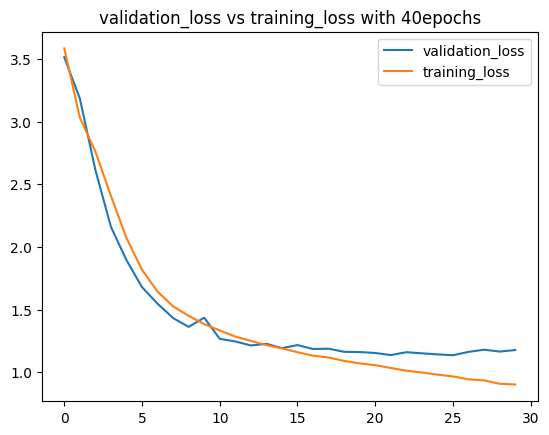

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'], label= 'validation_loss')
plt.plot(history.history['loss'], label = 'training_loss')
plt.legend()
plt.title('validation_loss vs training_loss with 40epochs')

Text(0.5, 1.0, 'validation_accuracy vs training_accuracy with 40epochs')

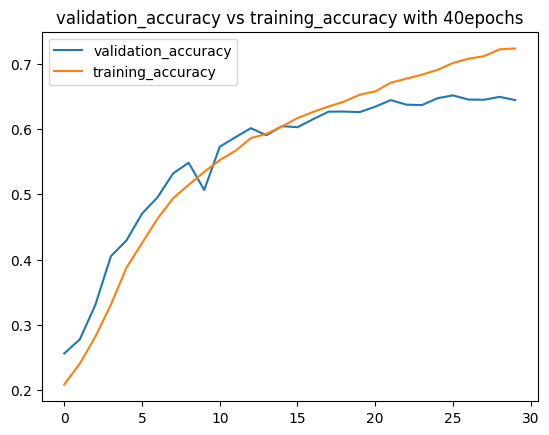

In [11]:
plt.plot(history.history['val_accuracy'], label= 'validation_accuracy')
plt.plot(history.history['accuracy'], label = 'training_accuracy')
plt.legend()
plt.title('validation_accuracy vs training_accuracy with 40epochs')

In [13]:
val_loss, val_acc = model.evaluate(val_generator, verbose=1)
print(f"Validation accuracy: {val_acc:.4f}")

449/449 [==============================] - 3s 7ms/step - loss: 1.1778 - accuracy: 0.6443
Validation accuracy: 0.6443
